In [25]:
import pandas as pd
import numpy as np

from os import path

from utils.data_utils import read_data_from_file
from models.TrendDecompose import TrendDecompose
from matplotlib import pyplot as plt

from utils.metrics import akkake_criteria, rmse, determination_coef, rsse, adjusted_det_coef, log_likelihood, mean_dependent_var, std_dependent_var, shwarz_criteria   
from statsmodels.stats.stattools import durbin_watson


%matplotlib inline

In [26]:
def get_stats(y_true, y_pred, model_params):
    print(pd.Series({
        'rmse': rmse(y_true, y_pred, model_params),
        'durbin watson':durbin_watson(y_true-y_pred),
        'determination coef':determination_coef(y_true, y_pred)
    }))

# Read Data

In [2]:
time_series = read_data_from_file('data/EXPCA.txt')

In [3]:
train_time_series, test_time_series = time_series[:-50], time_series[-50:]

In [4]:
train_time_series, test_time_series = np.log1p(pd.Series(train_time_series)), np.log1p(pd.Series(test_time_series))

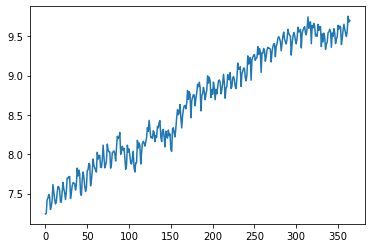

In [5]:
plt.plot(train_time_series)

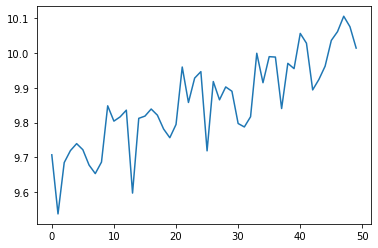

In [6]:
plt.plot(test_time_series)

# Trend Decompose

Decomposition coefs: [-3.581914065201601e-15, 0.9806221218562052]


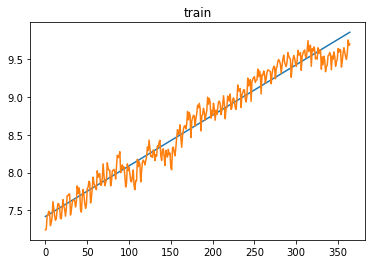

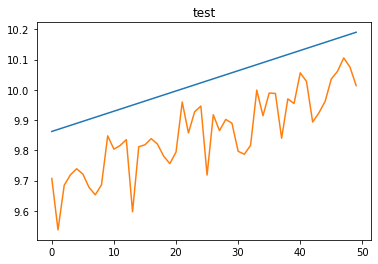

In [36]:
trend_decomposer = TrendDecompose(1) 
trend_1 = trend_decomposer.decompose(train_time_series)
print('Decomposition coefs: {}'.format(trend_decomposer.coefs))
plt.title('train')
plt.plot(trend_1)
plt.plot(train_time_series)
plt.show()

plt.title('test')
plt.plot(trend_decomposer.decompose_extr(list(range(len(train_time_series), len(train_time_series)+ len(test_time_series)))))
plt.plot(test_time_series)
plt.show()

In [27]:
get_stats(train_time_series, trend_1, 2)

rmse                  0.141251
durbin watson         0.628678
determination coef    0.961620
dtype: float64


Decomposition coefs: [-3.561577098684244e-15, 1.233458890563009, -0.2611733399432502]


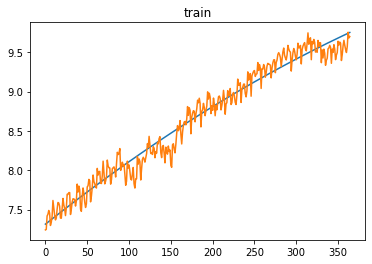

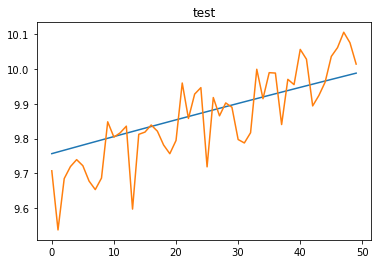

In [8]:
trend_decomposer = TrendDecompose(2) 
trend_2 = trend_decomposer.decompose(train_time_series)
print('Decomposition coefs: {}'.format(trend_decomposer.coefs))
plt.title('train')
plt.plot(trend_2)
plt.plot(train_time_series)
plt.show()

plt.title('test')
plt.plot(trend_decomposer.decompose_extr(list(range(len(train_time_series), len(train_time_series)+ len(test_time_series)))))
plt.plot(test_time_series)
plt.show()

In [28]:
get_stats(train_time_series, trend_2, 3)

rmse                  0.133316
durbin watson         0.707566
determination coef    0.965905
dtype: float64


Decomposition coefs: [-3.80412182577346e-15, 0.49654383352825576, 1.6444713321314555, -1.2091864609485612]


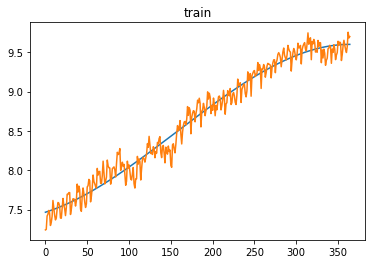

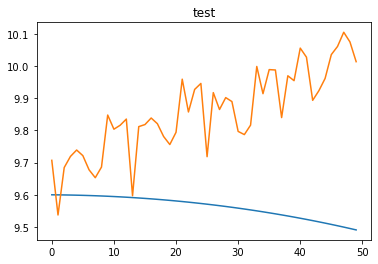

In [9]:
trend_decomposer = TrendDecompose(3) 
trend_3 = trend_decomposer.decompose(train_time_series)
print('Decomposition coefs: {}'.format(trend_decomposer.coefs))
plt.title('train')
plt.plot(trend_3)
plt.plot(train_time_series)
plt.show()

plt.title('test')
plt.plot(trend_decomposer.decompose_extr(list(range(len(train_time_series), len(train_time_series)+ len(test_time_series)))))
plt.plot(test_time_series)
plt.show()

In [29]:
get_stats(train_time_series, trend_3, 4)

rmse                  0.119986
durbin watson         0.876266
determination coef    0.972458
dtype: float64


# ARIMA

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
arima_model = ARIMA(train_time_series, order=(4, 1, 4))
arima_model = arima_model.fit()
arima_predict = arima_model.predict(1, len(train_time_series)+len(test_time_series), typ='levels')

/home/vsydorskyi/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [12]:
dynamic_arima_predict = []
for i in range(len(test_time_series)):
    dinamic_arima_model = ARIMA(list(train_time_series) + dynamic_arima_predict, order=(4, 1, 4))
    dinamic_arima_model = dinamic_arima_model.fit()
    temp_arima_predict = dinamic_arima_model.predict(1, len(train_time_series)+len(test_time_series), typ='levels')
    dynamic_arima_predict.append(temp_arima_predict[-len(test_time_series)+i])

/home/vsydorskyi/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/vsydorskyi/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/vsydorskyi/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/vsydorskyi/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/vsydorskyi/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverti

ARIMA coefs:
 const        0.006360
ar.L1.D.y   -0.699845
ar.L2.D.y   -0.259381
ar.L3.D.y   -0.740358
ar.L4.D.y   -0.947073
ma.L1.D.y    0.590481
ma.L2.D.y    0.043786
ma.L3.D.y    0.773389
ma.L4.D.y    0.829586
dtype: float64


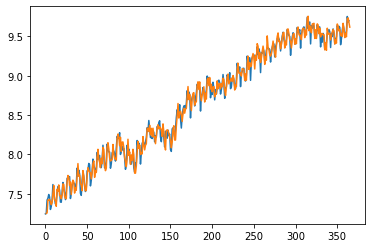

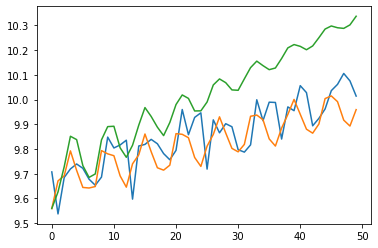

In [13]:
print('ARIMA coefs:\n {}'.format(arima_model.params))

plt.plot(train_time_series)
plt.plot(arima_predict.iloc[:-len(test_time_series)])
plt.show()

plt.plot(test_time_series)
plt.plot(arima_predict.iloc[-len(test_time_series):].reset_index(drop=True))
plt.plot(dynamic_arima_predict)
plt.show()

In [32]:
get_stats(train_time_series, np.array(arima_predict.iloc[:-len(test_time_series)]), 9)

rmse                  0.080721
durbin watson         2.051601
determination coef    0.999702
dtype: float64


# AR

In [14]:
from statsmodels.tsa.ar_model import AR

In [15]:
ar_model = AR(train_time_series)
ar_model = ar_model.fit(1)
ar_predict = ar_model.predict(1, len(train_time_series)+len(test_time_series))

In [16]:
dynamic_ar_predict = []
for i in range(len(test_time_series)):
    dinamic_ar_model = AR(list(train_time_series) + dynamic_ar_predict)
    dinamic_ar_model = dinamic_ar_model.fit(1)
    temp_ar_predict = dinamic_ar_model.predict(1, len(train_time_series)+len(test_time_series))
    dynamic_ar_predict.append(temp_ar_predict[-len(test_time_series)+i])

AR coefs:
 const    0.13049
L1.y     0.98567
dtype: float64


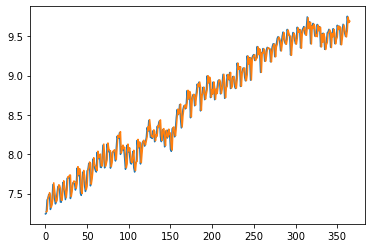

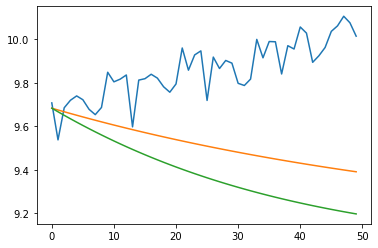

In [17]:
print('AR coefs:\n {}'.format(ar_model.params))

plt.plot(train_time_series)
plt.plot(ar_predict.iloc[:-len(test_time_series)])
plt.show()

plt.plot(test_time_series)
plt.plot(ar_predict.iloc[-len(test_time_series):].reset_index(drop=True))
plt.plot(dynamic_ar_predict)
plt.show()

In [33]:
get_stats(train_time_series, np.array(ar_predict.iloc[:-len(test_time_series)]), 2)

rmse                  0.012329
durbin watson         0.017007
determination coef    0.971546
dtype: float64


# ARMA

In [18]:
from statsmodels.tsa.arima_model import ARMA

In [19]:
arma_model = ARMA(train_time_series, order=(4, 4))
arma_model = arma_model.fit()
arma_predict = arma_model.predict(1, len(train_time_series)+len(test_time_series))

In [20]:
dynamic_arma_predict = []
for i in range(len(test_time_series)):
    dinamic_arma_model = ARMA(list(train_time_series) + dynamic_ar_predict, order=(4, 4))
    dinamic_arma_model = dinamic_arma_model.fit()
    temp_arma_predict = dinamic_arma_model.predict(1, len(train_time_series)+len(test_time_series))
    dynamic_arma_predict.append(temp_arma_predict[-len(test_time_series)+i])

/home/vsydorskyi/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/vsydorskyi/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/vsydorskyi/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/vsydorskyi/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/vsydorskyi/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/base/mo

ARMA coefs:
 const      8.510381
ar.L1.y    1.272683
ar.L2.y   -0.545116
ar.L3.y   -0.451545
ar.L4.y    0.723179
ma.L1.y   -0.755887
ma.L2.y    0.181770
ma.L3.y    0.826648
ma.L4.y   -0.492670
dtype: float64


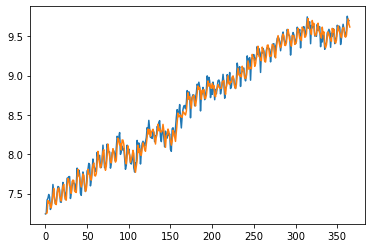

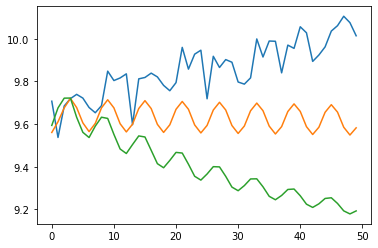

In [21]:
print('ARMA coefs:\n {}'.format(arma_model.params))

plt.plot(train_time_series)
plt.plot(arma_predict.iloc[:-len(test_time_series)])
plt.show()

plt.plot(test_time_series)
plt.plot(arma_predict.iloc[-len(test_time_series):].reset_index(drop=True))
plt.plot(dynamic_arma_predict)
plt.show()

In [34]:
get_stats(train_time_series, np.array(arma_predict.iloc[:-len(test_time_series)]), 9)

rmse                  0.074314
durbin watson         1.305941
determination coef    0.997063
dtype: float64


# Results

In [39]:
r_df = pd.DataFrame({
    'real_value':test_time_series,
    'trend_1':trend_decomposer.decompose_extr(list(range(len(train_time_series), len(train_time_series)+ len(test_time_series)))),
    'ARIMA':arima_predict.iloc[-len(test_time_series):].reset_index(drop=True),
    'AR':ar_predict.iloc[-len(test_time_series):].reset_index(drop=True),
    'ARMA':arma_predict.iloc[-len(test_time_series):].reset_index(drop=True),
})

In [43]:
rmse = lambda y_true, y_pred: (sum((y_true - y_pred)**2) / len(y_true))**0.5
mpe = lambda y_true, y_pred: sum(((y_true - y_pred) / y_true))*100
mape = lambda y_true, y_pred: sum(np.abs((y_true - y_pred) / y_true))*100
theil = lambda y_true, y_pred: rmse(y_true, y_pred) / (rmse(y_true, np.zeros_like(y_true)) + rmse(y_pred, np.zeros_like(y_pred)))

In [44]:
results = []
for alg in ['trend_1', 'ARIMA', 'AR', 'ARMA']:
    results.append([rmse(r_df['real_value'], r_df[alg]),
                    mpe(r_df['real_value'], r_df[alg]), 
                    mape(r_df['real_value'], r_df[alg]) , 
                    theil(r_df['real_value'], r_df[alg])])

In [48]:
pd.DataFrame(results, columns=['rmse','mpe','mape','theil'], index=['trend_1', 'ARIMA', 'AR', 'ARMA'])

,rmse,mpe,mape,theil
trend_1,0.183913,-86.359070,86.359070,0.009249
ARIMA,0.096783,18.945586,39.791134,0.004919
AR,0.395550,169.668130,172.549946,0.020412
ARMA,0.267219,114.957807,116.575212,0.013713


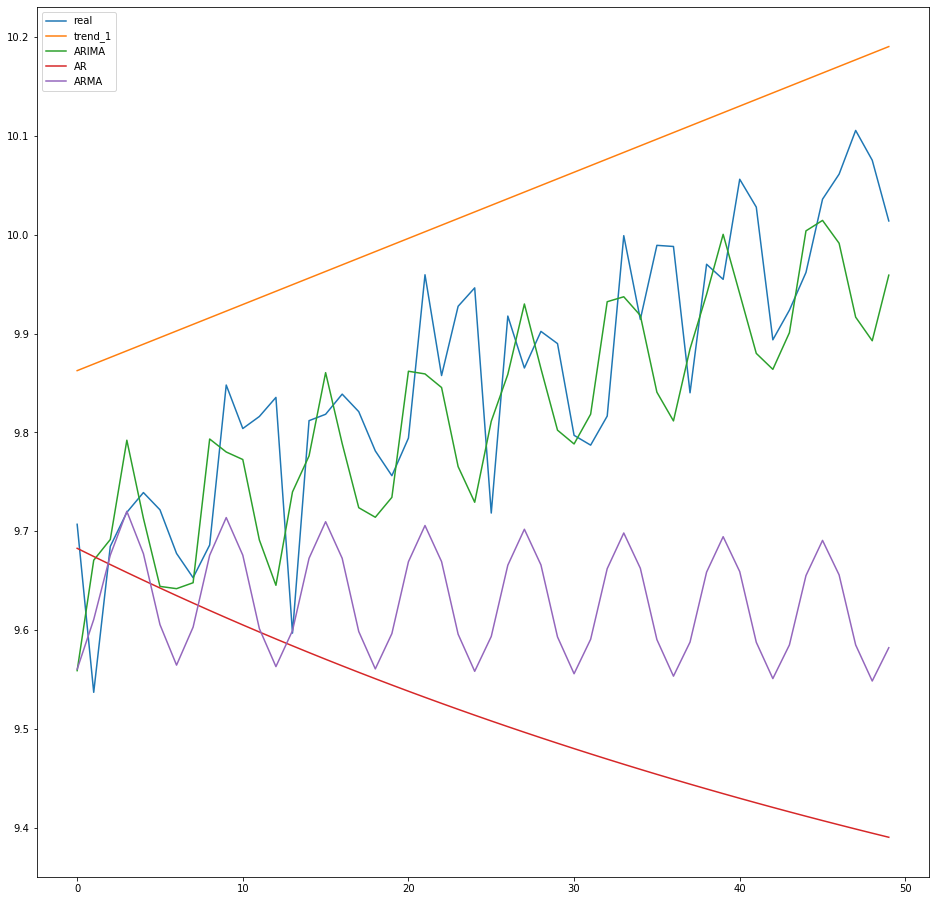

In [49]:
plt.figure(figsize=(16,16))

plt.plot(test_time_series, label='real')
plt.plot(trend_decomposer.decompose_extr(list(range(len(train_time_series), len(train_time_series)+ len(test_time_series)))), label='trend_1')
plt.plot(arima_predict.iloc[-len(test_time_series):].reset_index(drop=True), label='ARIMA')
plt.plot(ar_predict.iloc[-len(test_time_series):].reset_index(drop=True), label='AR')
plt.plot(arma_predict.iloc[-len(test_time_series):].reset_index(drop=True), label='ARMA')

plt.legend(loc='upper left')
plt.show()

In [51]:
r_df = pd.DataFrame({
    'real_value':test_time_series,
    'trend_1':trend_decomposer.decompose_extr(list(range(len(train_time_series), len(train_time_series)+ len(test_time_series)))),
    'ARIMA':dynamic_arima_predict,
    'AR':dynamic_ar_predict,
    'ARMA':dynamic_arma_predict,
})
r_df

,real_value,trend_1,ARIMA,AR,ARMA
0,9.707114,9.862588,9.559028,9.682793,9.593679
1,9.537109,9.869280,9.626055,9.666242,9.675790
2,9.684741,9.875971,9.728314,9.650027,9.721467
3,9.719210,9.882663,9.851395,9.634148,9.721942
4,9.739226,9.889355,9.837865,9.618602,9.631928
5,9.721756,9.896047,9.732492,9.603386,9.561218
6,9.677628,9.902739,9.684923,9.588498,9.536811
7,9.653063,9.909431,9.698901,9.573935,9.590260
8,9.686158,9.916122,9.836750,9.559694,9.632081
9,9.848017,9.922814,9.890448,9.545771,9.626397


In [52]:
results = []
for alg in ['trend_1', 'ARIMA', 'AR', 'ARMA']:
    results.append([rmse(r_df['real_value'], r_df[alg]),
                    mpe(r_df['real_value'], r_df[alg]), 
                    mape(r_df['real_value'], r_df[alg]) , 
                    theil(r_df['real_value'], r_df[alg])])

In [53]:
pd.DataFrame(results, columns=['rmse','mpe','mape','theil'], index=['trend_1', 'ARIMA', 'AR', 'ARMA'])

,rmse,mpe,mape,theil
trend_1,0.183913,-86.359070,86.359070,0.009249
ARIMA,0.186449,-76.323512,81.016827,0.009385
AR,0.532554,233.993522,236.701538,0.027663
ARMA,0.526289,228.957926,232.680838,0.027323


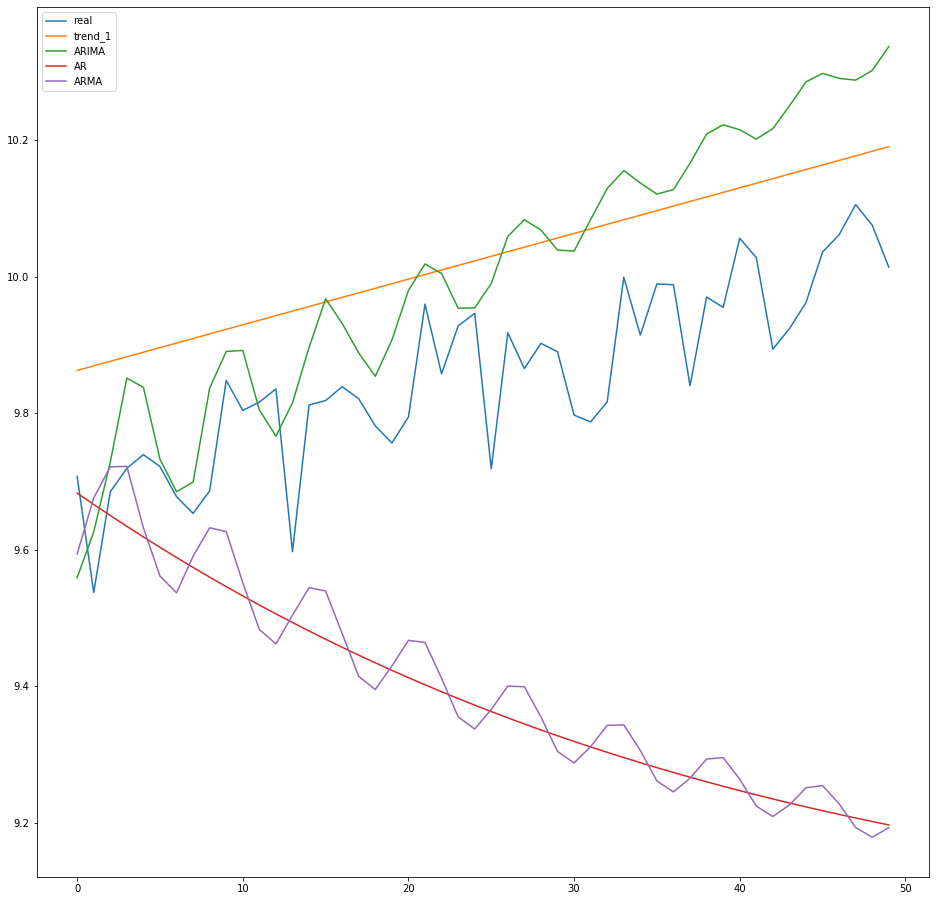

In [54]:
plt.figure(figsize=(16,16))

plt.plot(test_time_series, label='real')
plt.plot(trend_decomposer.decompose_extr(list(range(len(train_time_series), len(train_time_series)+ len(test_time_series)))), label='trend_1')
plt.plot(dynamic_arima_predict, label='ARIMA')
plt.plot(dynamic_ar_predict, label='AR')
plt.plot(dynamic_arma_predict, label='ARMA')

plt.legend(loc='upper left')
plt.show()